<a href="https://colab.research.google.com/github/Ansonex/Image-Classification-Cat-and-Dog-/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Dependencies and Setup

In [76]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/data"

cat  dog


In [78]:
import tensorflow as tf
import os    # use for joi path file 

## Upload image and run the image

In [79]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [80]:
data_dir = '/content/drive/MyDrive/data'

In [81]:
os.listdir(data_dir)

['cat', 'dog']

In [82]:
len(os.listdir("/content/drive/My Drive/data/cat"))

280

In [83]:
len(os.listdir("/content/drive/My Drive/data/dog"))

280

In [84]:
img = cv2.imread(os.path.join('/content/drive/My Drive/data','cat','cat107.jpeg'))

In [85]:
img.shape

(1500, 1000, 3)

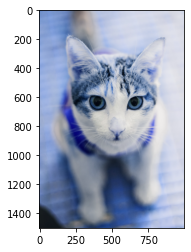

In [86]:
plt.imshow(img)

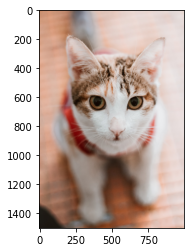

In [87]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [88]:
import numpy as np


## Preprocessing data

Bacthing the image as same unit and resize all image 

In [89]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/My Drive/data',batch_size = 40)   # we can change the batch size at here 

Found 560 files belonging to 2 classes.


In [90]:
data = data.map(lambda x, y: (x/255, y))

In [91]:
scaled_iterator = data.as_numpy_iterator()

In [92]:
batch = scaled_iterator.next()

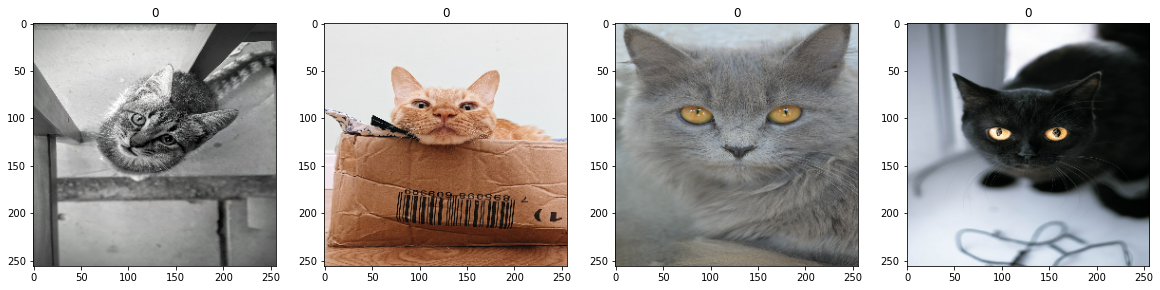

In [93]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

## Split data

1 bacth have 40 image 

In [94]:
len(data)

14

In [95]:
train_size = int(len(data)*0.7)   # training set
val_size = int(len(data)*0.2)+1   # Validation set
test_size = int(len(data)*0.1)+1  # Test Set

In [96]:
train_size

9

In [97]:
val_size

3

In [98]:
test_size

2

In [99]:
train = data.take(train_size)         # take 9 bacth as a train data
val = data.skip(train_size).take(val_size)    # skip train and take the val_size ( 3 bacth) as a validation data
test = data.skip(train_size + val_size).take(test_size) # skip train data and val_size, and take test_size ( 2 bactch)

## Build model

In [100]:
from tensorflow.keras.models import Sequential   # ( one of the model for tensorflow/ keras - one input and one output )
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten# hidden layer 

Conv2D - 2D convolution layer 

In [101]:
model = Sequential()  # build neural network Frame

Add in the layer 

In [102]:
model.add(Conv2D(20,(3,3),1, activation = "relu", input_shape=(256,256,3)))       # 20 filter 
model.add(MaxPooling2D())

model.add(Conv2D(40,(3,3),1, activation = "relu"))                                # 40 filter
model.add(MaxPooling2D())

model.add(Conv2D(20,(3,3),1, activation = "relu"))                                # 20 filter 
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [103]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 20)      560       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 20)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 40)      7240      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 40)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 20)        7220      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 20)      

## Train

In [105]:
logdir = '/content/.config/logs'

In [106]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [107]:
hist = model.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 12s 867ms/step - loss: 0.9580 - accuracy: 0.4556 - val_loss: 0.6936 - val_accuracy: 0.4583
Epoch 2/20
9/9 [==============================] - 9s 858ms/step - loss: 0.6943 - accuracy: 0.5000 - val_loss: 0.6895 - val_accuracy: 0.6333
Epoch 3/20
9/9 [==============================] - 9s 850ms/step - loss: 0.6845 - accuracy: 0.5833 - val_loss: 0.6679 - val_accuracy: 0.6417
Epoch 4/20
9/9 [==============================] - 9s 855ms/step - loss: 0.6726 - accuracy: 0.5750 - val_loss: 0.6562 - val_accuracy: 0.6167
Epoch 5/20
9/9 [==============================] - 9s 849ms/step - loss: 0.6469 - accuracy: 0.6306 - val_loss: 0.6187 - val_accuracy: 0.6583
Epoch 6/20
9/9 [==============================] - 9s 853ms/step - loss: 0.6367 - accuracy: 0.6361 - val_loss: 0.5564 - val_accuracy: 0.7000
Epoch 7/20
9/9 [==============================] - 9s 853ms/step - loss: 0.6186 - accuracy: 0.6750 - val_loss: 0.5907 - val_accuracy: 0.7083
Epoch 8/20
9/9 [===

In [108]:
hist.history

{'loss': [0.958017110824585,
  0.6943466067314148,
  0.6844552159309387,
  0.6725972890853882,
  0.6469043493270874,
  0.6367225050926208,
  0.6185811161994934,
  0.5515187382698059,
  0.4741653501987457,
  0.4209592938423157,
  0.3258565664291382,
  0.32115501165390015,
  0.24367965757846832,
  0.1930077224969864,
  0.21113035082817078,
  0.15833520889282227,
  0.11212067306041718,
  0.07464592903852463,
  0.04570261016488075,
  0.03064240701496601],
 'accuracy': [0.4555555582046509,
  0.5,
  0.5833333134651184,
  0.574999988079071,
  0.6305555701255798,
  0.6361111402511597,
  0.675000011920929,
  0.7222222089767456,
  0.7777777910232544,
  0.8083333373069763,
  0.8500000238418579,
  0.8916666507720947,
  0.9083333611488342,
  0.9333333373069763,
  0.9305555820465088,
  0.9444444179534912,
  0.9722222089767456,
  0.9916666746139526,
  0.9916666746139526,
  0.9972222447395325],
 'val_loss': [0.6936333775520325,
  0.689537763595581,
  0.6678693294525146,
  0.656234085559845,
  0.618715

## Plot Performance

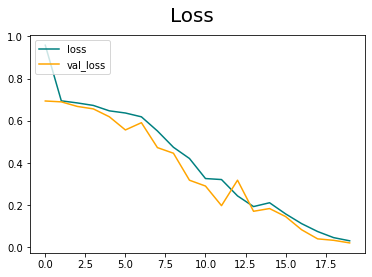

In [109]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange', label= 'val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

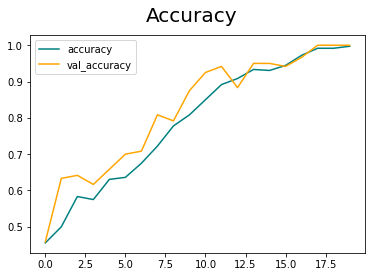

In [111]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange', label= 'val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluation Model

In [112]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [113]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [114]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

2/2 [==============================] - 0s 17ms/step


In [115]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:1.0, Recall: 1.0, Accuracy: 1.0


## Test

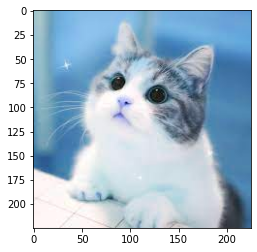

In [131]:
img_cat = cv2.imread('/content/drive/MyDrive/DemoCat.jpg')
plt.imshow(img_cat)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

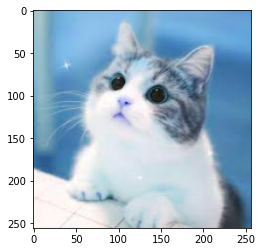

In [132]:
resize_cat = tf.image.resize(img_cat , (256,256))
plt.imshow(resize_cat.numpy().astype(int))
plt.show

In [133]:
yhat = model.predict(np.expand_dims(resize_cat/255,0))

1/1 [==============================] - 0s 22ms/step


In [134]:
yhat

array([[0.39924574]], dtype=float32)

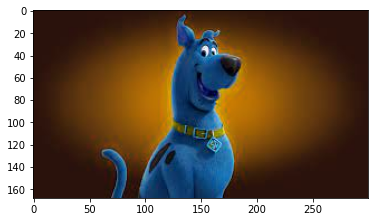

In [135]:
img_dog = cv2.imread('/content/drive/MyDrive/scooby doo.jpg')
plt.imshow(img_dog)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

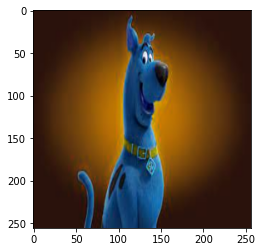

In [136]:
resize_dog = tf.image.resize(img_dog , (256,256))
plt.imshow(resize_dog.numpy().astype(int))
plt.show

In [137]:
yhat = model.predict(np.expand_dims(resize_dog/255,0))

1/1 [==============================] - 0s 18ms/step


In [138]:
yhat

array([[0.94747967]], dtype=float32)

## Save Model 

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','catdogmodel.h5'))